In [2]:
# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import plotly.graph_objects as go
import numpy as np

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pyro
import pyro.distributions as dist
import pyro.optim as optim
import torch
from pyro.infer import SVI, Predictive, Trace_ELBO
from pyro.infer.autoguide import AutoMultivariateNormal, init_to_mean

import seaborn as sns

import pyro
import pyro.distributions as dist
import pyro.nn as nn



from typing import List, Dict, Tuple, Optional

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from collab2.utils import find_repo_root

root = find_repo_root()
from collab2.foraging import random_hungry_followers as rhf
from collab2.foraging import toolkit as ft
from IPython.display import HTML

logging.basicConfig(format="%(message)s", level=logging.INFO)

# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pyro
import pyro.distributions as dist
import pyro.optim as optim
import torch

from collab2.utils import find_repo_root

root = find_repo_root()
from collab2.foraging import random_hungry_followers as rhf
import collab2.foraging.toolkit as ft

from collab2.foraging.toolkit import (
    animate_predictors,
    constraint_filter_nearest,
    dataObject,
    generate_local_windows,
    plot_predictor,
    rescale_to_grid,
    subsample_frames_constant_frame_rate,
)


logging.basicConfig(format="%(message)s", level=logging.INFO)

# users can ignore smoke_test -- it's for automatic testing on GitHub, to make sure the notebook runs on future updates to the repository
smoke_test = "CI" in os.environ
#smoke_test = True
num_frames = 5 if smoke_test else 50
num_svi_iters = 10 if smoke_test else 1000
num_samples = 10 if smoke_test else 1000
 
notebook_starts = time.time()

ImportError: cannot import name 'AutoMultivariateNormal' from 'pyro.infer' (/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/infer/__init__.py)

In [ ]:
random.seed(23)
np.random.seed(23)

random_foragers_sim = rhf.RandomForagers(
    grid_size=40,
    probabilities=[1, 2, 3, 2, 1, 2, 3, 2, 1],
    num_foragers=3,
    num_frames=num_frames,
    num_rewards=15,
    grab_range=3,
)

# run a particular simulation with these parameters
random_foragers_sim()

# the results of the simulation are stored in `random_foragers_sim.foragersDF`.
# each row contains the x and y coordinates of a forager at a particular time

random_foragers_sim.foragersDF.head()

x     y  time  forager    type
0  20.0  23.0     0        0  random
1  24.0  23.0     1        0  random
2  26.0  25.0     2        0  random
3  24.0  28.0     3        0  random
4  22.0  26.0     4        0  random

In [ ]:
print(random_foragers_sim.grid_size)


local_windows_kwargs = {
    "window_size": 10,
    "sampling_fraction": 1,
    "skip_incomplete_frames": False,
}

predictor_kwargs = {
    "proximity": {
        "interaction_length": random_foragers_sim.grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": {},
        "repulsion_radius": 1.5,
        "optimal_distance": 4,
        "proximity_decay": 1,
    },
    "food":
        {
          "decay_factor": 0.5,
        },
}

score_kwargs = {
    "nextStep_linear": {"nonlinearity_exponent": 1},
    "nextStep_sublinear": {"nonlinearity_exponent": 0.5},
}

derivedDF_random = ft.derive_predictors_and_scores(
    random_foragers_sim,
    local_windows_kwargs,
    predictor_kwargs=predictor_kwargs,
    score_kwargs=score_kwargs,
    dropna=True,
    add_scaled_values=True,
)

display(derivedDF_random.head()) 

40
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


2024-09-17 11:34:36,941 - proximity completed in 0.58 seconds.
2024-09-17 11:34:37,501 - food completed in 0.56 seconds.
2024-09-17 11:34:37,762 - nextStep_linear completed in 0.26 seconds.
2024-09-17 11:34:37,920 - nextStep_sublinear completed in 0.16 seconds.
/home/rafal/s78projects/collab-creatures/collab2/foraging/toolkit/derive.py:56: UserWarning: 
                      Dropped 903/44578 frames from `derivedDF` due to NaN values.
                      Missing values can arise when computations depend on next/previous step positions
                      that are unavailable. See documentation of the corresponding predictor/score generating
                      functions for more information.
                      
  warnings.warn(


x   y  distance_to_forager  time  forager  proximity      food  \
0  10  23            10.000000     0        0   0.047853  0.211446   
1  11  19             9.848858     0        0   0.123592  0.269768   
2  11  20             9.486833     0        0   0.157399  0.255077   
3  11  21             9.219544     0        0   0.171165  0.242907   
4  11  22             9.055385     0        0   0.157952  0.240538   

   distance_to_next_step  nextStep_linear  nextStep_sublinear  \
0              14.000000         0.000000            0.000000   
1              13.601471         0.028466            0.014336   
2              13.341664         0.047024            0.023795   
3              13.152946         0.060504            0.030724   
4              13.038405         0.068685            0.034954   

   proximity_scaled  food_scaled  nextStep_linear_scaled  \
0          0.523927     0.211410                0.000000   
1          0.561796     0.269734                0.028466   
2          0.578699     0.255043                0.047024   
3          0.585583     0.242872                0.060504   
4          0.578976     0.240503                0.068685   

   nextStep_sublinear_scaled  
0                   0.000000  
1                   0.014336  
2                   0.023795  
3                   0.030724  
4                   0.034954

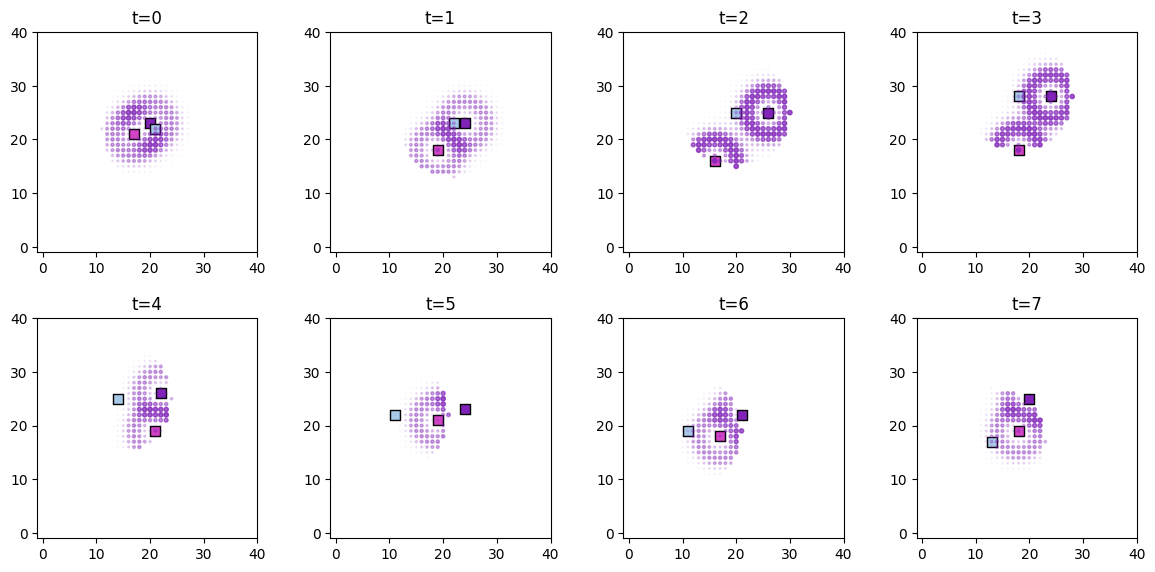

In [ ]:
plot_predictor(
    random_foragers_sim.foragers,
    random_foragers_sim.derived_quantities['proximity'],
    predictor_name = "proximity",
    time = range(min(8,num_frames)),
    grid_size = 40,
    size_multiplier=10,
    random_state=99,
    forager_position_indices =  [0,1,2],
    forager_predictor_indices = [1],
)

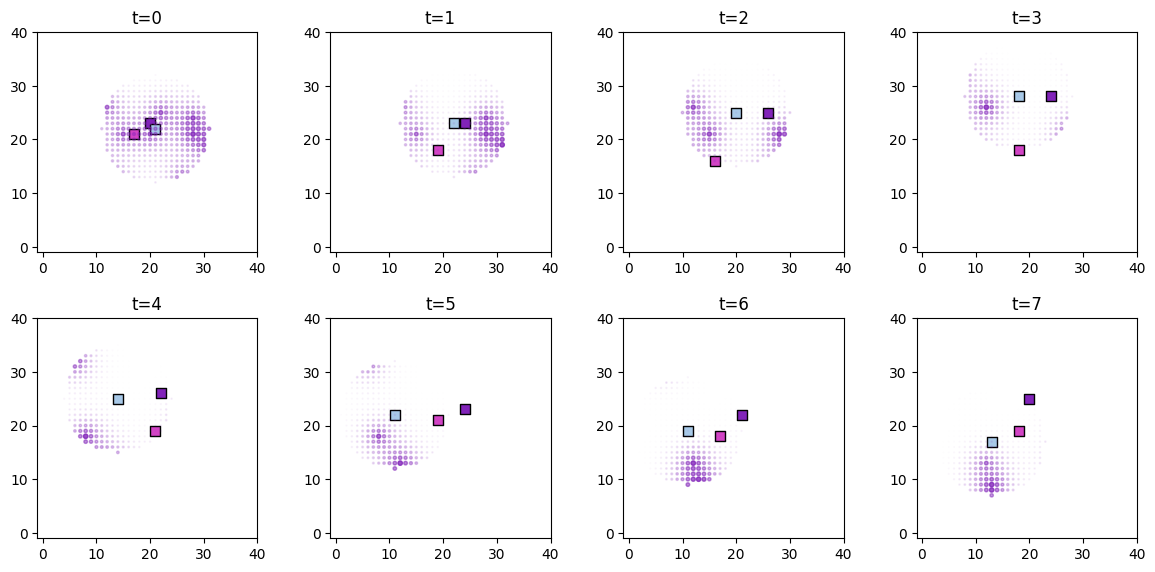

In [ ]:
plot_predictor(
    random_foragers_sim.foragers,
    random_foragers_sim.derived_quantities['food'],
    predictor_name = "food",
    time = range(min(8,num_frames)),
    grid_size = 40,
    size_multiplier=10,
    random_state=99,
    forager_position_indices =  [0,1,2],
    forager_predictor_indices = [1],
)

2024-09-17 11:34:40,081 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


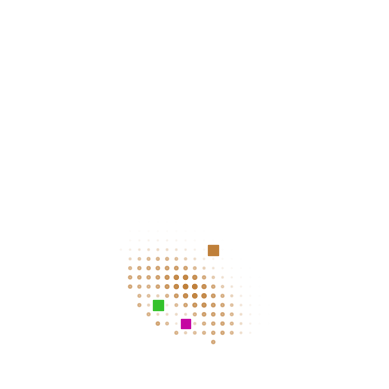

In [ ]:
ani = animate_predictors(
    random_foragers_sim.foragersDF,
    random_foragers_sim.derived_quantities['proximity'],
    predictor_name="proximity",
    forager_position_indices=[0,1,2],
    forager_predictor_indices=[1],
    grid_size=40,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())

2024-09-17 11:34:41,482 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


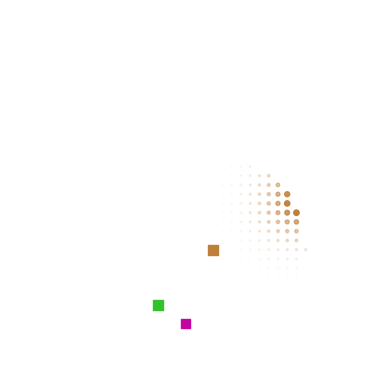

In [ ]:
ani = animate_predictors(
    random_foragers_sim.foragersDF,
    random_foragers_sim.derived_quantities['food'],
    predictor_name="food",
    forager_position_indices=[0,1,2],
    forager_predictor_indices=[1],
    grid_size=40,
    random_state=10,
    size_multiplier=15,
)
HTML(ani.to_jshtml())

In [ ]:

predictors = ['proximity_scaled', 'food_scaled', 'distance_to_forager']
outcome_vars = ['nextStep_linear']


predictor_tensors_random, outcome_tensor_random = ft.prep_data_for_inference(random_foragers_sim, predictors, outcome_vars)


In [ ]:
# plot outcome vs predictors
ft.visualise_forager_predictors(
    predictors = [predictor_tensors_random['proximity_scaled'], 
                  predictor_tensors_random['food_scaled'],
                  predictor_tensors_random['distance_to_forager']],
    predictor_names=['proximity_scaled', 'food_scaled', 'distance_to_forager'],
    outcome_name="nextStep_linear",
    outcome=outcome_tensor_random['nextStep_linear'],
    sampling_rate=.5,
)

/home/rafal/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning:

Can't initialize NVML



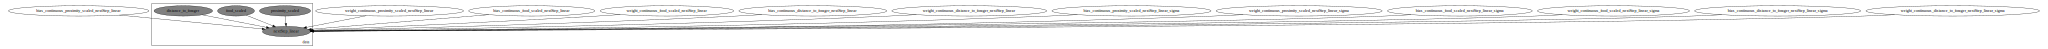

In [ ]:
model_sigmavar_random = ft.HeteroskedasticLinear(predictor_tensors_random, outcome_tensor_random)
pyro.render_model(
    model_sigmavar_random,
    model_args=(predictor_tensors_random, outcome_tensor_random),
    render_deterministic = True
)

In [ ]:
guide_random = ft.run_svi_inference(model_sigmavar_random, n_steps=num_svi_iters, predictors = predictor_tensors_random, outcome = outcome_tensor_random)